In [18]:
from data_loader import MNISTFashionDataLoader
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
loader = MNISTFashionDataLoader()


In [4]:
X_train, y_train, X_val, y_val = loader.get_train_and_validation_set()

In [9]:
# get test data
X_test = loader.get_test_data()

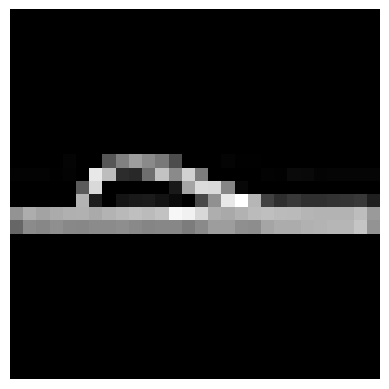

In [30]:
test_image = X_test[10] * 255
test_image = test_image.astype("uint8")
test_image = test_image.reshape(28, 28)
import matplotlib.pyplot as plt
plt.imshow(test_image, cmap="gray")
plt.axis("off")
plt.show()

In [17]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
750/750 [==============================] - 21s 25ms/step - loss: 0.5156 - accuracy: 0.8156 - val_loss: 0.3834 - val_accuracy: 0.8600
Epoch 2/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3369 - accuracy: 0.8778 - val_loss: 0.3210 - val_accuracy: 0.8837
Epoch 3/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2884 - accuracy: 0.8946 - val_loss: 0.3044 - val_accuracy: 0.8878
Epoch 4/10
750/750 [==============================] - 18s 24ms/step - loss: 0.2563 - accuracy: 0.9056 - val_loss: 0.2639 - val_accuracy: 0.9032
Epoch 5/10
750/750 [==============================] - 20s 27ms/step - loss: 0.2281 - accuracy: 0.9155 - val_loss: 0.2539 - val_accuracy: 0.9057
Epoch 6/10
750/750 [==============================] - 21s 29ms/step - loss: 0.2082 - accuracy: 0.9233 - val_loss: 0.2754 - val_accuracy: 0.9014
Epoch 7/10
750/750 [==============================] - 19s 26ms/step - loss: 0.1875 - accuracy: 0.9310 - val_loss: 0.2509 - val_accuracy:

In [19]:
# predict on test data
predictions = model.predict(X_test)

313/313 [==============================] - 3s 7ms/step


In [22]:
predicted_labels = np.argmax(predictions, axis=1)

In [34]:
loader.create_submission_file(predicted_labels, file_name="submission_cnn_simple_adam10.csv")